# 주택가격 데이터 분석

## 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# 0.데이터 확인

https://data.kbland.kr/

- 데이터: [KB부동산 데이터 허브](https://data.kbland.kr/) → KB 통계 → 주택가격동향조사
    - [주간 아파트 매매가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptSalePriceInx) 전체('24년 10월 7일 기준)
    - [주간 아파트 전세가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptRentPriceInx) 전체('24년 10월 7일 기준)
- 가격지수: 기준시점(22년 1월 10일) 대비 조사 시점(24년 10월)의 가격 비율 (주택별·지역별 가중)
- 지역별 날짜별 매매가격지수, 전세가격지수 시각화를 통한 트렌드 분석
- 매매가격지수와 전세가격지수의 관계 시각화
- 매매가격지수와 전세가격지수의 차이가 큰/적은 지역 판단

# 1.필요 라이브러리 임포트 및 파일 읽어오기

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import matplotlib.font_manager as fm

#for i in fm.fontManager.ttflist:
    #if i.name.find('Gothic') != -1 : #Gulim, NanumGothic
       # print(i.name)
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic' #matplotlib에 사용할 기본폰트를 지정
rcParams['axes.unicode_minus'] = False



In [52]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## CSV 파일 데이터 읽어오기

In [53]:
sales = pd.read_excel('../data/주간 아파트 매매가격지수_20241026.xlsx')
lease = pd.read_excel('../data/주간 아파트 전세가격지수_20241026.xlsx')

In [54]:
sales = sales[2:29]
lease = lease[2:29]

In [55]:
sales.head()

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,2023-01-02 00:00:52,2023-01-09 00:00:52,2023-01-16 00:00:52,2023-01-30 00:00:52,2023-02-06 00:00:52,2023-02-13 00:00:52,2023-02-20 00:00:52,2023-02-27 00:00:52,2023-03-06 00:00:52,2023-03-13 00:00:52,2023-03-20 00:00:52,2023-03-27 00:00:52,2023-04-03 00:00:52,2023-04-10 00:00:52,2023-04-17 00:00:52,2023-04-24 00:00:52,2023-05-01 00:00:52,2023-05-08 00:00:52,2023-05-15 00:00:52,2023-05-22 00:00:52,2023-05-29 00:00:52,2023-06-05 00:00:52,2023-06-12 00:00:52,2023-06-19 00:00:52,2023-06-26 00:00:52,2023-07-03 00:00:52,2023-07-10 00:00:52,2023-07-17 00:00:52,2023-07-24 00:00:52,2023-07-31 00:00:52,2023-08-07 00:00:52,2023-08-14 00:00:52,2023-08-21 00:00:52,2023-08-28 00:00:52,2023-09-04 00:00:52,2023-09-11 00:00:52,2023-09-18 00:00:52,2023-09-25 00:00:52,2023-10-09 00:00:52,2023-10-16 00:00:52,2023-10-23 00:00:52,2023-10-30 00:00:52,2023-11-06 00:00:52,2023-11-13 00:00:52,2023-11-20 00:00:52,2023-11-27 00:00:52,2023-12-04 00:00:52,2023-12-11 00:00:52,2023-12-18 00:00:52,2023-12-25 00:00:52,2024.01.01,2024-01-08 00:00:52,2024-01-15 00:00:52,2024-01-22 00:00:52,2024-01-29 00:00:52,2024-02-05 00:00:52,2024-02-19 00:00:52,2024-02-26 00:00:52,2024-03-04 00:00:52,2024-03-11 00:00:52,2024-03-18 00:00:52,2024-03-25 00:00:52,2024-04-01 00:00:52,2024-04-08 00:00:52,2024-04-15 00:00:52,2024-04-22 00:00:52,2024-04-29 00:00:52,2024-05-06 00:00:52,2024-05-13 00:00:52,2024-05-20 00:00:52,2024-05-27 00:00:52,2024-06-03 00:00:52,2024-06-10 00:00:52,2024-06-17 00:00:52,2024-06-24 00:00:52,2024-07-01 00:00:52,2024-07-08 00:00:52,2024-07-15 00:00:52,2024-07-22 00:00:52,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
2,강북14개구,98.642112,98.340583,98.052583,97.612834,97.32794,97.032485,96.620466,96.316564,95.883823,95.523678,95.199349,94.860519,94.292981,93.800264,93.355514,93.03027,92.57035,92.314046,92.01173,91.692069,91.367392,91.158636,90.904616,90.723878,90.433068,90.233642,90.095632,89.972595,89.749367,89.602263,89.534037,89.416386,89.271378,89.144166,89.040262,88.952567,88.806027,88.65941,88.57746,88.556439,88.52114,88.503273,88.522318,88.553556,88.5443,88.564576,88.594957,88.603443,88.615011,88.646116,88.672905,88.654303,88.628675,88.599421,88.568188,88.542502,88.514525,88.469239,88.434435,88.411664,88.380968,88.330971,88.295146,88.255961,88.19718,88.166386,88.125345,88.092889,88.054033,88.016196,87.973303,87.924786,87.847536,87.828423,87.819360,87.806177,87.768795,87.761779,87.738587,87.748853,87.764671,87.786036,87.822147,87.864471,87.901463,87.943695,87.991757,88.121333,88.226486,88.340533,88.495919,88.664465,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905,89.579069,89.621939
3,종로구,101.272184,101.272184,101.268392,101.099196,101.099196,101.058259,101.051544,100.986561,100.986561,100.975354,100.9066,100.868029,100.816712,100.735564,100.735564,100.636524,99.687595,99.607735,99.584092,99.502861,97.966648,97.924989,97.650643,97.650643,97.601186,97.446833,97.255046,97.03158,97.035604,97.025701,97.061222,97.090094,97.124057,97.19354,97.19354,97.19354,97.194753,97.168746,97.168796,97.173606,97.161887,97.308774,97.433006,97.498596,97.499628,97.51826,97.565621,97.565621,97.607221,97.668012,97.716187,97.798417,97.824401,97.824401,97.824401,97.837452,97.840228,97.840228,97.850237,97.749291,97.749291,97.749291,97.749291,97.733255,97.733255,97.721400,97.721400,97.673205,97.613686,97.576362,97.669471,97.672848,97.674091,97.674091,97.635306,97.635306,97.627900,97.545097,97.546511,97.515546,97.490108,97.753375,97.806351,98.034107,98.159543,98.193729,98.278037,98.366782,98.399677,98.687133,98.687133,98.810194,98.870809,99.008700,99.156805,99.250936,

In [56]:
sales.reset_index()

,index,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,2023-01-02 00:00:52,2023-01-09 00:00:52,2023-01-16 00:00:52,2023-01-30 00:00:52,2023-02-06 00:00:52,2023-02-13 00:00:52,2023-02-20 00:00:52,2023-02-27 00:00:52,2023-03-06 00:00:52,2023-03-13 00:00:52,2023-03-20 00:00:52,2023-03-27 00:00:52,2023-04-03 00:00:52,2023-04-10 00:00:52,2023-04-17 00:00:52,2023-04-24 00:00:52,2023-05-01 00:00:52,2023-05-08 00:00:52,2023-05-15 00:00:52,2023-05-22 00:00:52,2023-05-29 00:00:52,2023-06-05 00:00:52,2023-06-12 00:00:52,2023-06-19 00:00:52,2023-06-26 00:00:52,2023-07-03 00:00:52,2023-07-10 00:00:52,2023-07-17 00:00:52,2023-07-24 00:00:52,2023-07-31 00:00:52,2023-08-07 00:00:52,2023-08-14 00:00:52,2023-08-21 00:00:52,2023-08-28 00:00:52,2023-09-04 00:00:52,2023-09-11 00:00:52,2023-09-18 00:00:52,2023-09-25 00:00:52,2023-10-09 00:00:52,2023-10-16 00:00:52,2023-10-23 00:00:52,2023-10-30 00:00:52,2023-11-06 00:00:52,2023-11-13 00:00:52,2023-11-20 00:00:52,2023-11-27 00:00:52,2023-12-04 00:00:52,2023-12-11 00:00:52,2023-12-18 00:00:52,2023-12-25 00:00:52,2024.01.01,2024-01-08 00:00:52,2024-01-15 00:00:52,2024-01-22 00:00:52,2024-01-29 00:00:52,2024-02-05 00:00:52,2024-02-19 00:00:52,2024-02-26 00:00:52,2024-03-04 00:00:52,2024-03-11 00:00:52,2024-03-18 00:00:52,2024-03-25 00:00:52,2024-04-01 00:00:52,2024-04-08 00:00:52,2024-04-15 00:00:52,2024-04-22 00:00:52,2024-04-29 00:00:52,2024-05-06 00:00:52,2024-05-13 00:00:52,2024-05-20 00:00:52,2024-05-27 00:00:52,2024-06-03 00:00:52,2024-06-10 00:00:52,2024-06-17 00:00:52,2024-06-24 00:00:52,2024-07-01 00:00:52,2024-07-08 00:00:52,2024-07-15 00:00:52,2024-07-22 00:00:52,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,2,강북14개구,98.642112,98.340583,98.052583,97.612834,97.32794,97.032485,96.620466,96.316564,95.883823,95.523678,95.199349,94.860519,94.292981,93.800264,93.355514,93.03027,92.57035,92.314046,92.01173,91.692069,91.367392,91.158636,90.904616,90.723878,90.433068,90.233642,90.095632,89.972595,89.749367,89.602263,89.534037,89.416386,89.271378,89.144166,89.040262,88.952567,88.806027,88.65941,88.57746,88.556439,88.52114,88.503273,88.522318,88.553556,88.5443,88.564576,88.594957,88.603443,88.615011,88.646116,88.672905,88.654303,88.628675,88.599421,88.568188,88.542502,88.514525,88.469239,88.434435,88.411664,88.380968,88.330971,88.295146,88.255961,88.19718,88.166386,88.125345,88.092889,88.054033,88.016196,87.973303,87.924786,87.847536,87.828423,87.819360,87.806177,87.768795,87.761779,87.738587,87.748853,87.764671,87.786036,87.822147,87.864471,87.901463,87.943695,87.991757,88.121333,88.226486,88.340533,88.495919,88.664465,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905,89.579069,89.621939
1,3,종로구,101.272184,101.272184,101.268392,101.099196,101.099196,101.058259,101.051544,100.986561,100.986561,100.975354,100.9066,100.868029,100.816712,100.735564,100.735564,100.636524,99.687595,99.607735,99.584092,99.502861,97.966648,97.924989,97.650643,97.650643,97.601186,97.446833,97.255046,97.03158,97.035604,97.025701,97.061222,97.090094,97.124057,97.19354,97.19354,97.19354,97.194753,97.168746,97.168796,97.173606,97.161887,97.308774,97.433006,97.498596,97.499628,97.51826,97.565621,97.565621,97.607221,97.668012,97.716187,97.798417,97.824401,97.824401,97.824401,97.837452,97.840228,97.840228,97.850237,97.749291,97.749291,97.749291,97.749291,97.733255,97.733255,97.721400,97.721400,97.673205,97.613686,97.576362,97.669471,97.672848,97.674091,97.674091,97.635306,97.635306,97.627900,97.545097,97.546511,97.515546,97.490108,97.753375,97.806351,98.034107,98.159543,98.193729,98.278037,98.366782,98.399677,98.687133,98.687133,98.810194,98.870809,99.008700,99.156805,

In [57]:
sales_melt = sales.melt(
    id_vars=['지역명'],
    var_name='날짜',
    value_name='가격'
)
sales_melt

,지역명,날짜,가격
0,강북14개구,2022-10-24 00:00:52,98.642112
1,종로구,2022-10-24 00:00:52,101.272184
2,중구,2022-10-24 00:00:52,99.717712
3,용산구,2022-10-24 00:00:52,102.497917
4,성동구,2022-10-24 00:00:52,100.275063
5,광진구,2022-10-24 00:00:52,100.861178
6,동대문구,2022-10-24 00:00:52,98.068763
7,중랑구,2022-10-24 00:00:52,99.979866
8,성북구,2022-10-24 00:00:52,97.447586
9,강북구,2022-10-24 00:00:52,99.492166


In [58]:
sales_melt['날짜']=pd.to_datetime(sales_melt['날짜'])
sales_melt['날짜'] = sales_melt['날짜'].dt.date

In [59]:
sales_melt

,지역명,날짜,가격
0,강북14개구,2022-10-24,98.642112
1,종로구,2022-10-24,101.272184
2,중구,2022-10-24,99.717712
3,용산구,2022-10-24,102.497917
4,성동구,2022-10-24,100.275063
5,광진구,2022-10-24,100.861178
6,동대문구,2022-10-24,98.068763
7,중랑구,2022-10-24,99.979866
8,성북구,2022-10-24,97.447586
9,강북구,2022-10-24,99.492166


In [60]:
sales_melt.isnull().sum()

지역명    0
날짜     0
가격     0
dtype: int64

In [61]:
lease.head()

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,2023-01-02 00:00:52,2023-01-09 00:00:52,2023-01-16 00:00:52,2023-01-30 00:00:52,2023-02-06 00:00:52,2023-02-13 00:00:52,2023-02-20 00:00:52,2023-02-27 00:00:52,2023-03-06 00:00:52,2023-03-13 00:00:52,2023-03-20 00:00:52,2023-03-27 00:00:52,2023-04-03 00:00:52,2023-04-10 00:00:52,2023-04-17 00:00:52,2023-04-24 00:00:52,2023-05-01 00:00:52,2023-05-08 00:00:52,2023-05-15 00:00:52,2023-05-22 00:00:52,2023-05-29 00:00:52,2023-06-05 00:00:52,2023-06-12 00:00:52,2023-06-19 00:00:52,2023-06-26 00:00:52,2023-07-03 00:00:52,2023-07-10 00:00:52,2023-07-17 00:00:52,2023-07-24 00:00:52,2023-07-31 00:00:52,2023-08-07 00:00:52,2023-08-14 00:00:52,2023-08-21 00:00:52,2023-08-28 00:00:52,2023-09-04 00:00:52,2023-09-11 00:00:52,2023-09-18 00:00:52,2023-09-25 00:00:52,2023-10-09 00:00:52,2023-10-16 00:00:52,2023-10-23 00:00:52,2023-10-30 00:00:52,2023-11-06 00:00:52,2023-11-13 00:00:52,2023-11-20 00:00:52,2023-11-27 00:00:52,2023-12-04 00:00:52,2023-12-11 00:00:52,2023-12-18 00:00:52,2023-12-25 00:00:52,2024.01.01,2024-01-08 00:00:52,2024-01-15 00:00:52,2024-01-22 00:00:52,2024-01-29 00:00:52,2024-02-05 00:00:52,2024-02-19 00:00:52,2024-02-26 00:00:52,2024-03-04 00:00:52,2024-03-11 00:00:52,2024-03-18 00:00:52,2024-03-25 00:00:52,2024-04-01 00:00:52,2024-04-08 00:00:52,2024-04-15 00:00:52,2024-04-22 00:00:52,2024-04-29 00:00:52,2024-05-06 00:00:52,2024-05-13 00:00:52,2024-05-20 00:00:52,2024-05-27 00:00:52,2024-06-03 00:00:52,2024-06-10 00:00:52,2024-06-17 00:00:52,2024-06-24 00:00:52,2024-07-01 00:00:52,2024-07-08 00:00:52,2024-07-15 00:00:52,2024-07-22 00:00:52,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
2,강북14개구,99.076653,98.631199,98.203469,97.662143,96.975049,96.416485,95.711619,95.000845,94.308194,93.634465,93.180163,92.620878,91.922146,90.92942,90.305925,89.858634,89.44531,89.12405,88.75258,88.385195,88.022602,87.737701,87.44889,87.124233,86.815218,86.624577,86.4734,86.296507,86.161154,86.069612,85.97199,85.893441,85.819149,85.691115,85.452564,85.371083,85.239981,85.11596,85.090254,85.033611,85.007793,85.006666,85.028134,85.065672,85.095671,85.138831,85.186821,85.263107,85.344742,85.487651,85.59206,85.717106,85.818159,85.882139,85.923081,85.999249,86.075572,86.184508,86.26647,86.331717,86.377528,86.448998,86.526611,86.611362,86.669548,86.731478,86.848286,86.959600,87.099270,87.210527,87.366585,87.487882,87.595763,87.721636,87.793347,87.887134,87.979205,88.083476,88.193773,88.365035,88.490550,88.607709,88.751969,88.947706,89.085497,89.300818,89.480658,89.705203,89.930330,90.174218,90.370755,90.537136,90.675880,90.874157,91.052678,91.205271,91.294162,91.351153,91.463412,91.562034,91.643295
3,종로구,100.130635,100.09141,100.062392,99.302315,99.099819,99.012114,98.415947,98.161897,97.97901,97.523185,97.233188,96.187777,95.843594,94.535638,94.270447,94.052442,93.52633,93.43233,93.352356,93.265259,91.5188,91.230225,91.106891,90.575996,90.090242,89.81419,89.708689,89.331228,89.361014,89.368146,89.36924,89.39361,89.516682,89.617121,89.721071,89.76378,89.76378,89.643839,89.532653,89.483565,89.562318,89.8127,89.8127,89.86404,90.018932,90.170902,90.246729,90.312372,90.312372,90.482187,90.659922,90.70478,90.906549,91.01524,91.25724,91.450909,91.668179,91.812766,91.909168,91.965911,92.199917,92.298174,92.390963,92.49198,92.609959,92.680702,92.680702,93.046293,93.111848,93.120846,93.216261,93.432882,93.446108,93.607515,93.607515,93.652347,93.887104,93.887104,93.887104,93.887104,93.888867,93.904974,94.076702,94.247052,94.271964,94.357391,94.360553,94.630114,94.818483,95.031845,95.063972,95.063972,95.327168,95.606297,95.791750,96.025197,96.292064,96.692286,96.9039

In [62]:
lease.reset_index()

,index,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,2022-12-26 00:00:52,2023-01-02 00:00:52,2023-01-09 00:00:52,2023-01-16 00:00:52,2023-01-30 00:00:52,2023-02-06 00:00:52,2023-02-13 00:00:52,2023-02-20 00:00:52,2023-02-27 00:00:52,2023-03-06 00:00:52,2023-03-13 00:00:52,2023-03-20 00:00:52,2023-03-27 00:00:52,2023-04-03 00:00:52,2023-04-10 00:00:52,2023-04-17 00:00:52,2023-04-24 00:00:52,2023-05-01 00:00:52,2023-05-08 00:00:52,2023-05-15 00:00:52,2023-05-22 00:00:52,2023-05-29 00:00:52,2023-06-05 00:00:52,2023-06-12 00:00:52,2023-06-19 00:00:52,2023-06-26 00:00:52,2023-07-03 00:00:52,2023-07-10 00:00:52,2023-07-17 00:00:52,2023-07-24 00:00:52,2023-07-31 00:00:52,2023-08-07 00:00:52,2023-08-14 00:00:52,2023-08-21 00:00:52,2023-08-28 00:00:52,2023-09-04 00:00:52,2023-09-11 00:00:52,2023-09-18 00:00:52,2023-09-25 00:00:52,2023-10-09 00:00:52,2023-10-16 00:00:52,2023-10-23 00:00:52,2023-10-30 00:00:52,2023-11-06 00:00:52,2023-11-13 00:00:52,2023-11-20 00:00:52,2023-11-27 00:00:52,2023-12-04 00:00:52,2023-12-11 00:00:52,2023-12-18 00:00:52,2023-12-25 00:00:52,2024.01.01,2024-01-08 00:00:52,2024-01-15 00:00:52,2024-01-22 00:00:52,2024-01-29 00:00:52,2024-02-05 00:00:52,2024-02-19 00:00:52,2024-02-26 00:00:52,2024-03-04 00:00:52,2024-03-11 00:00:52,2024-03-18 00:00:52,2024-03-25 00:00:52,2024-04-01 00:00:52,2024-04-08 00:00:52,2024-04-15 00:00:52,2024-04-22 00:00:52,2024-04-29 00:00:52,2024-05-06 00:00:52,2024-05-13 00:00:52,2024-05-20 00:00:52,2024-05-27 00:00:52,2024-06-03 00:00:52,2024-06-10 00:00:52,2024-06-17 00:00:52,2024-06-24 00:00:52,2024-07-01 00:00:52,2024-07-08 00:00:52,2024-07-15 00:00:52,2024-07-22 00:00:52,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,2,강북14개구,99.076653,98.631199,98.203469,97.662143,96.975049,96.416485,95.711619,95.000845,94.308194,93.634465,93.180163,92.620878,91.922146,90.92942,90.305925,89.858634,89.44531,89.12405,88.75258,88.385195,88.022602,87.737701,87.44889,87.124233,86.815218,86.624577,86.4734,86.296507,86.161154,86.069612,85.97199,85.893441,85.819149,85.691115,85.452564,85.371083,85.239981,85.11596,85.090254,85.033611,85.007793,85.006666,85.028134,85.065672,85.095671,85.138831,85.186821,85.263107,85.344742,85.487651,85.59206,85.717106,85.818159,85.882139,85.923081,85.999249,86.075572,86.184508,86.26647,86.331717,86.377528,86.448998,86.526611,86.611362,86.669548,86.731478,86.848286,86.959600,87.099270,87.210527,87.366585,87.487882,87.595763,87.721636,87.793347,87.887134,87.979205,88.083476,88.193773,88.365035,88.490550,88.607709,88.751969,88.947706,89.085497,89.300818,89.480658,89.705203,89.930330,90.174218,90.370755,90.537136,90.675880,90.874157,91.052678,91.205271,91.294162,91.351153,91.463412,91.562034,91.643295
1,3,종로구,100.130635,100.09141,100.062392,99.302315,99.099819,99.012114,98.415947,98.161897,97.97901,97.523185,97.233188,96.187777,95.843594,94.535638,94.270447,94.052442,93.52633,93.43233,93.352356,93.265259,91.5188,91.230225,91.106891,90.575996,90.090242,89.81419,89.708689,89.331228,89.361014,89.368146,89.36924,89.39361,89.516682,89.617121,89.721071,89.76378,89.76378,89.643839,89.532653,89.483565,89.562318,89.8127,89.8127,89.86404,90.018932,90.170902,90.246729,90.312372,90.312372,90.482187,90.659922,90.70478,90.906549,91.01524,91.25724,91.450909,91.668179,91.812766,91.909168,91.965911,92.199917,92.298174,92.390963,92.49198,92.609959,92.680702,92.680702,93.046293,93.111848,93.120846,93.216261,93.432882,93.446108,93.607515,93.607515,93.652347,93.887104,93.887104,93.887104,93.887104,93.888867,93.904974,94.076702,94.247052,94.271964,94.357391,94.360553,94.630114,94.818483,95.031845,95.063972,95.063972,95.327168,95.606297,95.791750,96.025197,96.292064,96.6922

In [63]:
lease_melt = lease.melt(
    id_vars=['지역명'],
    var_name='날짜',
    value_name='가격'
)
lease_melt

,지역명,날짜,가격
0,강북14개구,2022-10-24 00:00:52,99.076653
1,종로구,2022-10-24 00:00:52,100.130635
2,중구,2022-10-24 00:00:52,98.870586
3,용산구,2022-10-24 00:00:52,99.679785
4,성동구,2022-10-24 00:00:52,99.362464
5,광진구,2022-10-24 00:00:52,98.883386
6,동대문구,2022-10-24 00:00:52,98.580461
7,중랑구,2022-10-24 00:00:52,100.06476
8,성북구,2022-10-24 00:00:52,95.499072
9,강북구,2022-10-24 00:00:52,100.218593


In [64]:
lease_melt['날짜']=pd.to_datetime(lease_melt['날짜'])
lease_melt['날짜'] = lease_melt['날짜'].dt.date

In [65]:
lease_melt.isnull().sum()

지역명    0
날짜     0
가격     0
dtype: int64

In [66]:
lease_melt

,지역명,날짜,가격
0,강북14개구,2022-10-24,99.076653
1,종로구,2022-10-24,100.130635
2,중구,2022-10-24,98.870586
3,용산구,2022-10-24,99.679785
4,성동구,2022-10-24,99.362464
5,광진구,2022-10-24,98.883386
6,동대문구,2022-10-24,98.580461
7,중랑구,2022-10-24,100.06476
8,성북구,2022-10-24,95.499072
9,강북구,2022-10-24,100.218593


<Axes: xlabel='날짜', ylabel='가격'>

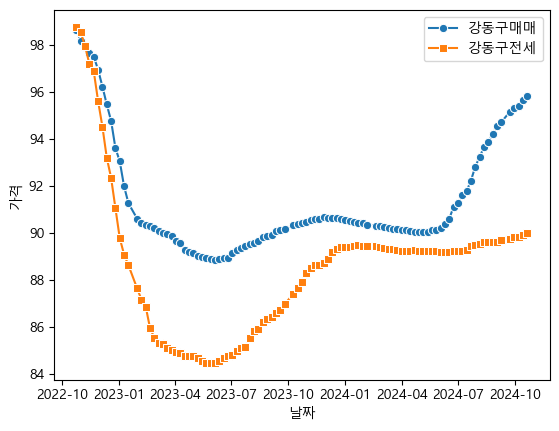

In [67]:
sns.lineplot(data=sales_melt.loc[sales_melt['지역명'] == '강동구'], x='날짜', y='가격', marker='o', label='강동구매매')
sns.lineplot(data=lease_melt.loc[sales_melt['지역명'] == '강동구'],  x='날짜', y='가격', marker='s', label='강동구전세')

In [68]:
locals = sales['지역명'].unique() 

local_cnt = len(locals) 

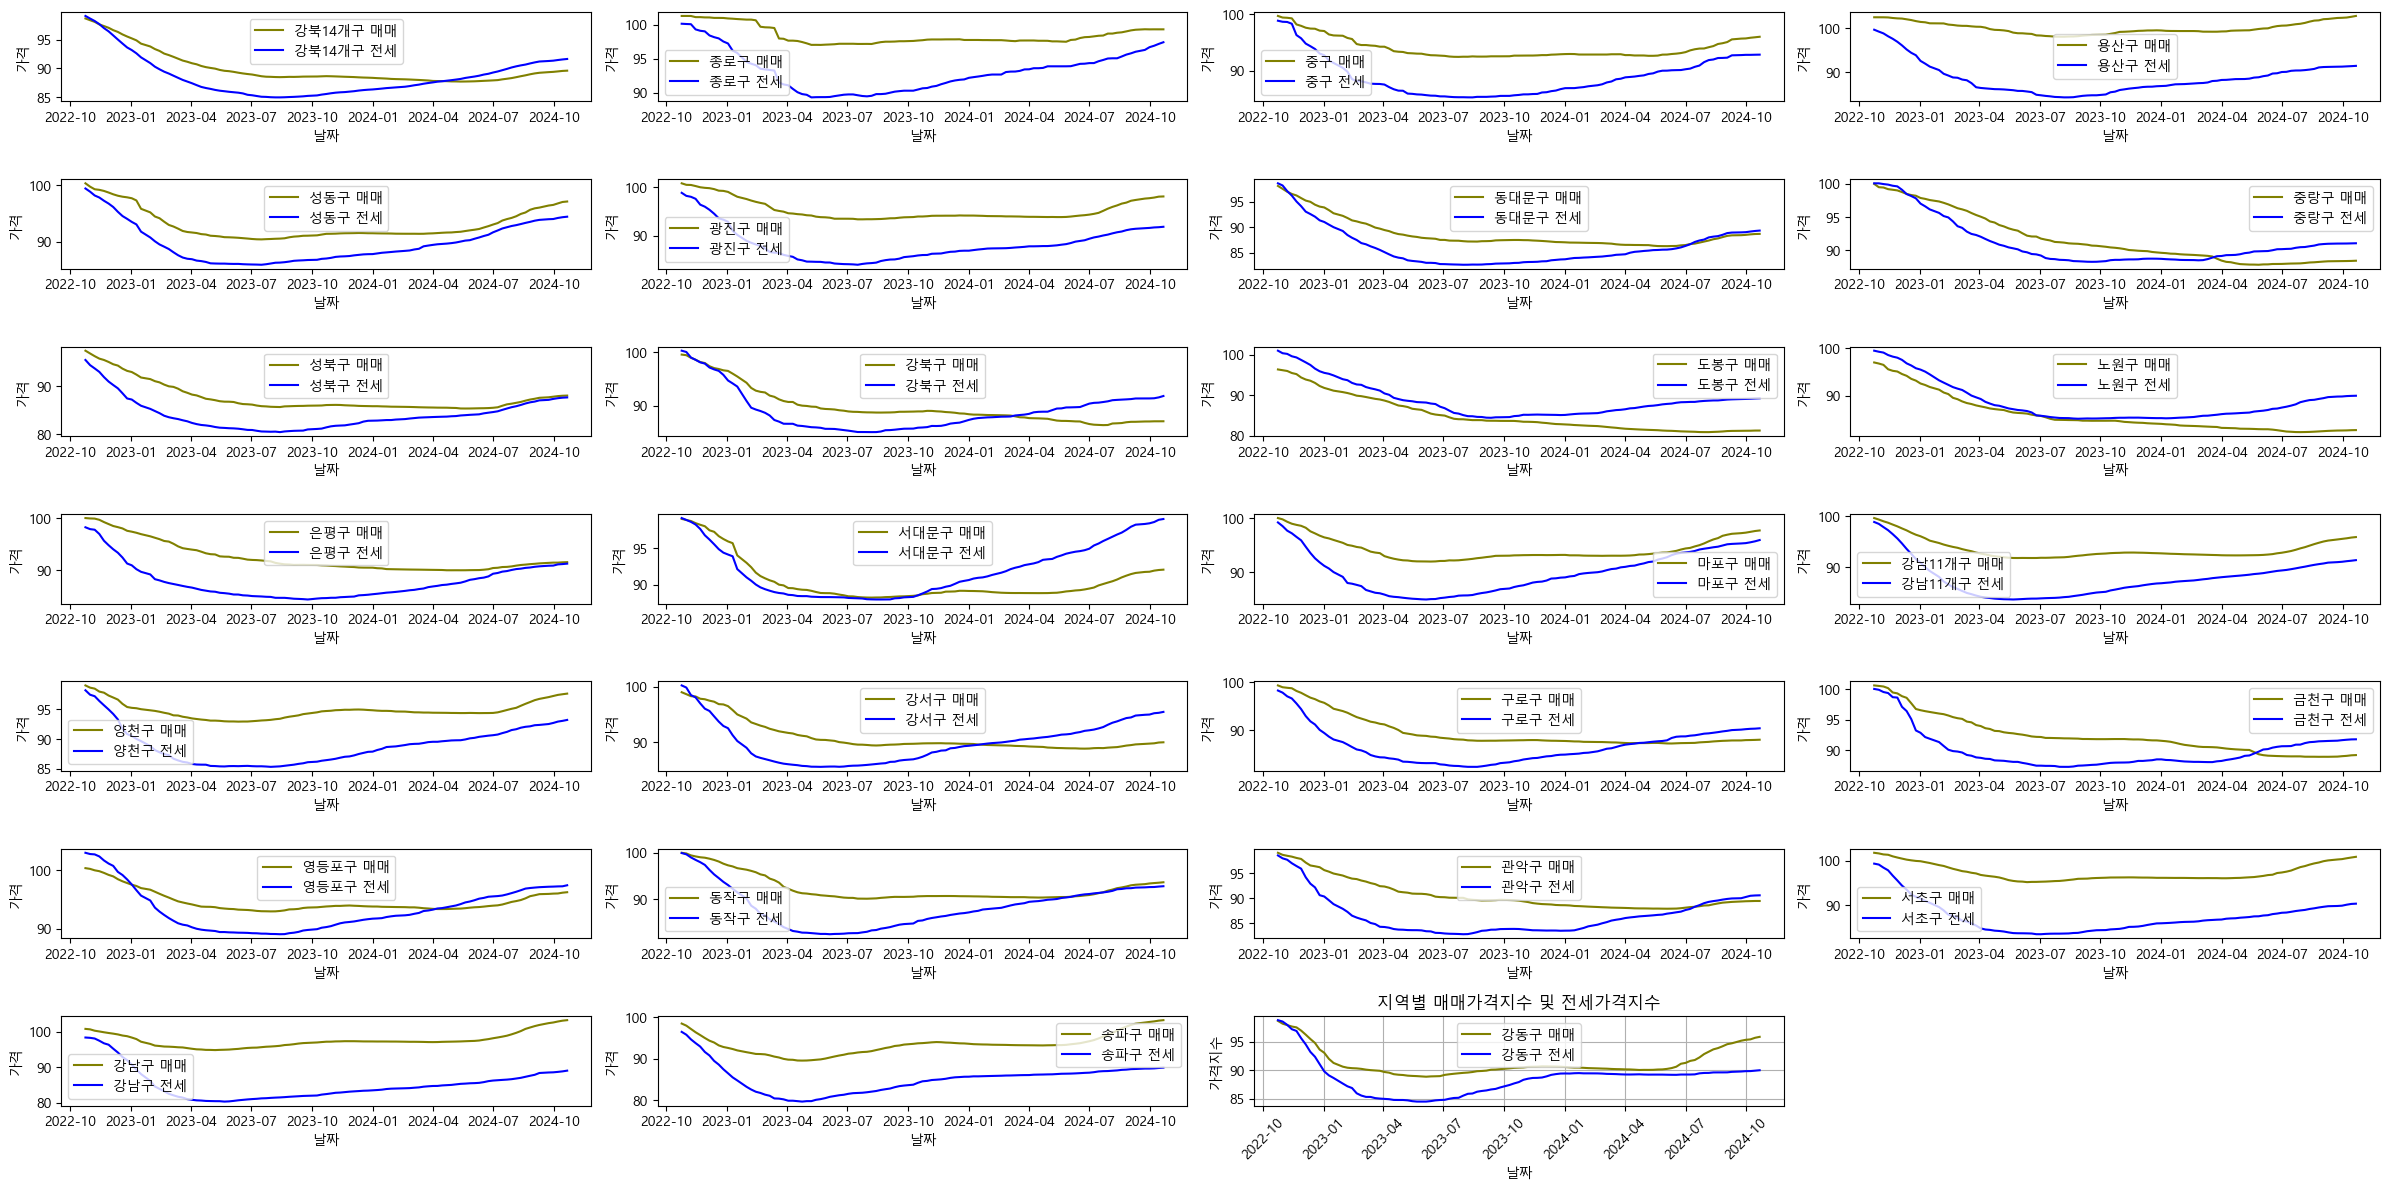

In [80]:
fig2 = plt.figure(figsize=(24,12),constrained_layout=True)
outer_grid = fig2.add_gridspec(local_cnt, 1)

for i,region in enumerate(locals):
    ax = fig2.add_subplot(7,4,i+1)
    sns.lineplot(data=sales_melt[sales_melt['지역명'] == region],x='날짜', y='가격', label=f'{region} 매매', color='olive')
    sns.lineplot(data=lease_melt[lease_melt['지역명'] == region],x='날짜', y='가격', label=f'{region} 전세', color='blue')

plt.title('지역별 매매가격지수 및 전세가격지수')
plt.xlabel('날짜')
plt.ylabel('가격지수')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

24-10월 기준

매매는 자산 형성과 안정성을 제공하는 반면, 전세는 유동성과 단기 거주에 유리

* 전세가 매매보다 비싼 지역 : 도봉구 > 노원구 > 서대문구
* 매매가 전세보다 비싼데,차이가 큰 지역 : 강남구 > 용산구 > 서초구 > 송파구 > 광진구
* 매매가 더 비싸지만 전세와 차이가 가장 적은 지역 
  1) 1순위 강북구,강서구,중랑구
  2) 2순위 강북14구,영등포구
  3) 3순위 강동구,구로구,금천구,동대문구

In [84]:

sales_agg = sales_melt.groupby('지역명')['가격'].mean()
lease_agg = lease_melt.groupby('지역명')['가격'].mean()

# 차이 계산
price_diff = sales_agg - lease_agg
price_diff_df = pd.DataFrame(price_diff).reset_index()
price_diff_df.columns = ['지역명', '가격 차이']

# 차이에 따라 지역 분류
high_diff = price_diff_df[price_diff_df['가격 차이'] > 0]  # 매매가가 전세가보다 높은 지역
low_diff = price_diff_df[price_diff_df['가격 차이'] < 0]   # 전세가가 매매가보다 높은 지역


# 결과 출력
print("차이가 큰 지역 (매매가 > 전세가):")
print(high_diff)

print("\n차이가 적은 지역 (전세가 > 매매가):")
print(low_diff)

차이가 큰 지역 (매매가 > 전세가):
       지역명      가격 차이
0   강남11개구   5.743768
1      강남구  12.455570
2      강동구   2.781129
3   강북14개구   1.436894
4      강북구   0.730745
5      강서구   0.954017
6      관악구   4.074871
7      광진구   7.116795
8      구로구   2.869657
9      금천구   2.392368
12    동대문구   2.582694
13     동작구   3.916345
14     마포구   4.220467
16     서초구   9.966433
17     성동구   3.271958
18     성북구   3.598927
19     송파구   8.265832
20     양천구   5.883588
21    영등포구   1.323611
22     용산구  11.413882
23     은평구   4.603733
24     종로구   5.213177
25      중구   5.059780
26     중랑구   0.572621

차이가 적은 지역 (전세가 > 매매가):
     지역명     가격 차이
10   노원구 -2.496766
11   도봉구 -3.741837
15  서대문구 -1.611701


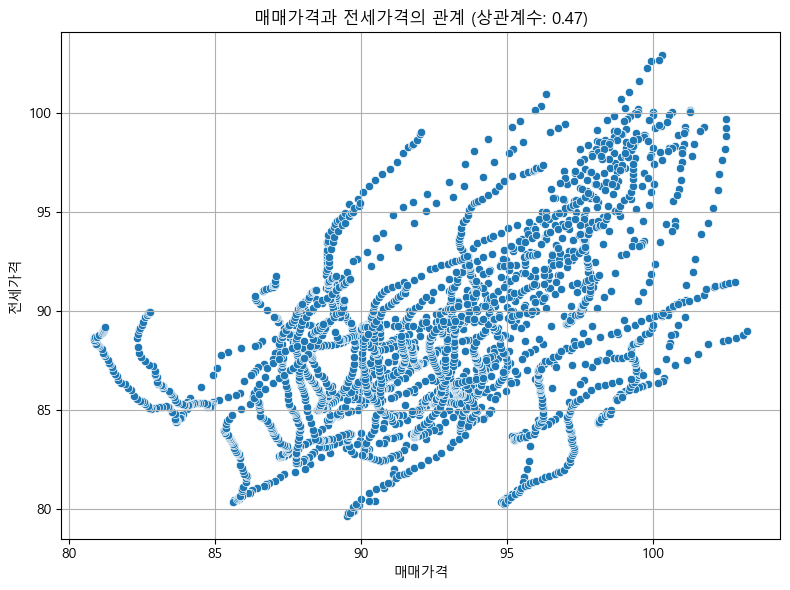

In [82]:
# 가격 열의 문자열을 숫자로 변환
sales_melt['가격'] = pd.to_numeric(sales_melt['가격'], errors='coerce')
lease_melt['가격'] = pd.to_numeric(lease_melt['가격'], errors='coerce')

correlation = sales_melt['가격'].corr(lease_melt['가격'])

# 상관계수 계산
correlation = sales_melt['가격'].corr(lease_melt['가격'])

# 결측치 제거 (필요에 따라)
sales_melt.dropna(subset=['가격'], inplace=True)
lease_melt.dropna(subset=['가격'], inplace=True)

# 산점도 플롯
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_melt, x='가격', y=lease_melt['가격'])
plt.title(f'매매가격과 전세가격의 관계 (상관계수: {correlation:.2f})')
plt.xlabel('매매가격')
plt.ylabel('전세가격')
plt.grid()
plt.tight_layout()
plt.show()

